In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.cluster import DBSCAN, KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [202]:
train = pd.read_csv("CC GENERAL.csv")
data = train.copy()

In [203]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [204]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

array([[<Axes: title={'center': 'BALANCE'}>,
        <Axes: title={'center': 'BALANCE_FREQUENCY'}>,
        <Axes: title={'center': 'PURCHASES'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES'}>],
       [<Axes: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <Axes: title={'center': 'CASH_ADVANCE'}>,
        <Axes: title={'center': 'PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<Axes: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_TRX'}>,
        <Axes: title={'center': 'PURCHASES_TRX'}>],
       [<Axes: title={'center': 'CREDIT_LIMIT'}>,
        <Axes: title={'center': 'PAYMENTS'}>,
        <Axes: title={'center': 'MINIMUM_PAYMENTS'}>,
        <Axes: title={'center': 'PRC_FULL_PAYMENT'}>],
       [<Axes: title={'center': 'TENURE'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

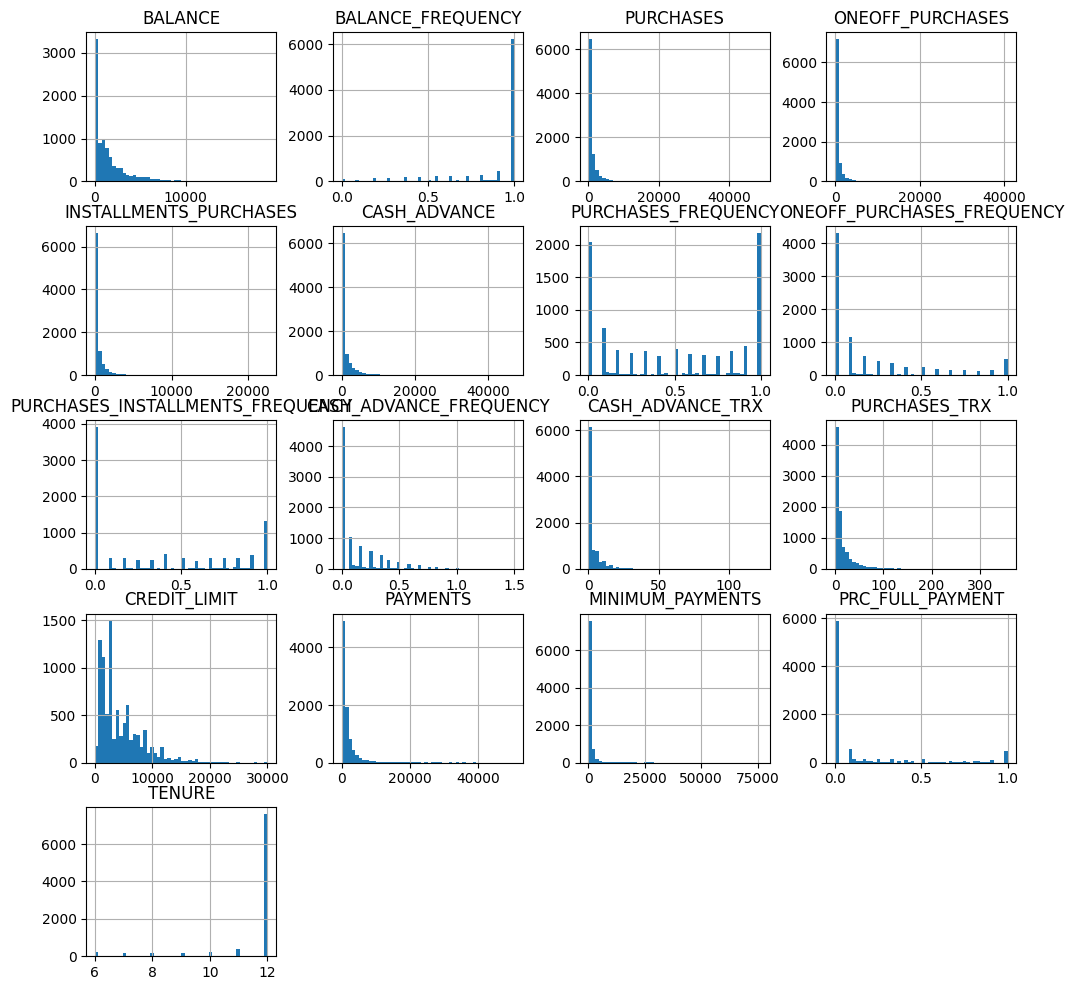

In [206]:
data.hist(figsize=(12,12), bins=50)

In [207]:
def get_outliers(col):
    q3 = data[col].quantile(0.75)
    q1 = data[col].quantile(0.25)
    iqr = q3 - q1
    mask = (data[col] < q1 - 1.5 * iqr) | (data[col] > q3 + 1.5 * iqr)
    return data[mask]

outliers = get_outliers('MINIMUM_PAYMENTS')
outliers

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5,C10006,1809.828751,1.0,1333.28,0.0,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
10,C10011,1293.124939,1.0,920.12,0.0,920.12,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1200.0,1083.301007,2172.697765,0.000000,12
15,C10016,6886.213231,1.0,1611.70,0.0,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.000000,12
19,C10020,3577.970933,1.0,398.64,0.0,398.64,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,4000.0,1053.980464,12465.549380,0.000000,12
20,C10021,2016.684686,1.0,176.68,0.0,176.68,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,2000.0,223.068600,13557.297260,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8705,C18942,7302.672686,1.0,0.00,0.0,0.00,10762.707760,0.000000,0.000000,0.000000,0.750000,19,0,9000.0,3824.308564,2214.506825,0.000000,12
8724,C18961,3002.791004,1.0,2463.00,2463.0,0.00,797.158950,0.166667,0.166667,0.000000,0.166667,3,3,3000.0,431.716492,16638.733850,0.000000,12
8754,C18993,455.471255,1.0,389.70,44.7,345.00,276.902382,1.000000,0.083333,0.916667,0.083333,4,14,1000.0,48.594194,3644.171310,0.090909,12
8873,C19114,1023.883008,1.0,585.84,0.0,585.84,956.849209,1.000000,0.000000,0.875000,0.125000,2,22,1000.0,212.105443,2789.590897,0.000000,8


In [234]:
data = train.copy()

data.drop('CUST_ID', axis=1, inplace=True)
data.dropna(subset=['CREDIT_LIMIT','MINIMUM_PAYMENTS'], inplace=True)

log_scaler = FunctionTransformer(np.log1p, validate=True)
data.iloc[:, :] = log_scaler.transform(data.iloc[:, :])

#scaler  = StandardScaler()
#data.iloc[:, :]  = scaler.fit_transform(data.iloc[:, :])

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(
C:\Users\hp\AppData\Local\Temp\ipykernel_9876\1224609220.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         1.60943791 0.         ... 0.         1.09861229 1.09861229]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.iloc[:, :] = log_scaler.transform(data.iloc[:, :])
C:\Users\hp\AppData\Local\Temp\ipykernel_9876\1224609220.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.09861229 0.         2.56494936 ... 1.79175947 0.         3.17805383]' has dtype incompatible with int64, please explicitly cast to a compatib

array([[<Axes: title={'center': 'BALANCE'}>,
        <Axes: title={'center': 'BALANCE_FREQUENCY'}>,
        <Axes: title={'center': 'PURCHASES'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES'}>],
       [<Axes: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <Axes: title={'center': 'CASH_ADVANCE'}>,
        <Axes: title={'center': 'PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<Axes: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_TRX'}>,
        <Axes: title={'center': 'PURCHASES_TRX'}>],
       [<Axes: title={'center': 'CREDIT_LIMIT'}>,
        <Axes: title={'center': 'PAYMENTS'}>,
        <Axes: title={'center': 'MINIMUM_PAYMENTS'}>,
        <Axes: title={'center': 'PRC_FULL_PAYMENT'}>],
       [<Axes: title={'center': 'TENURE'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

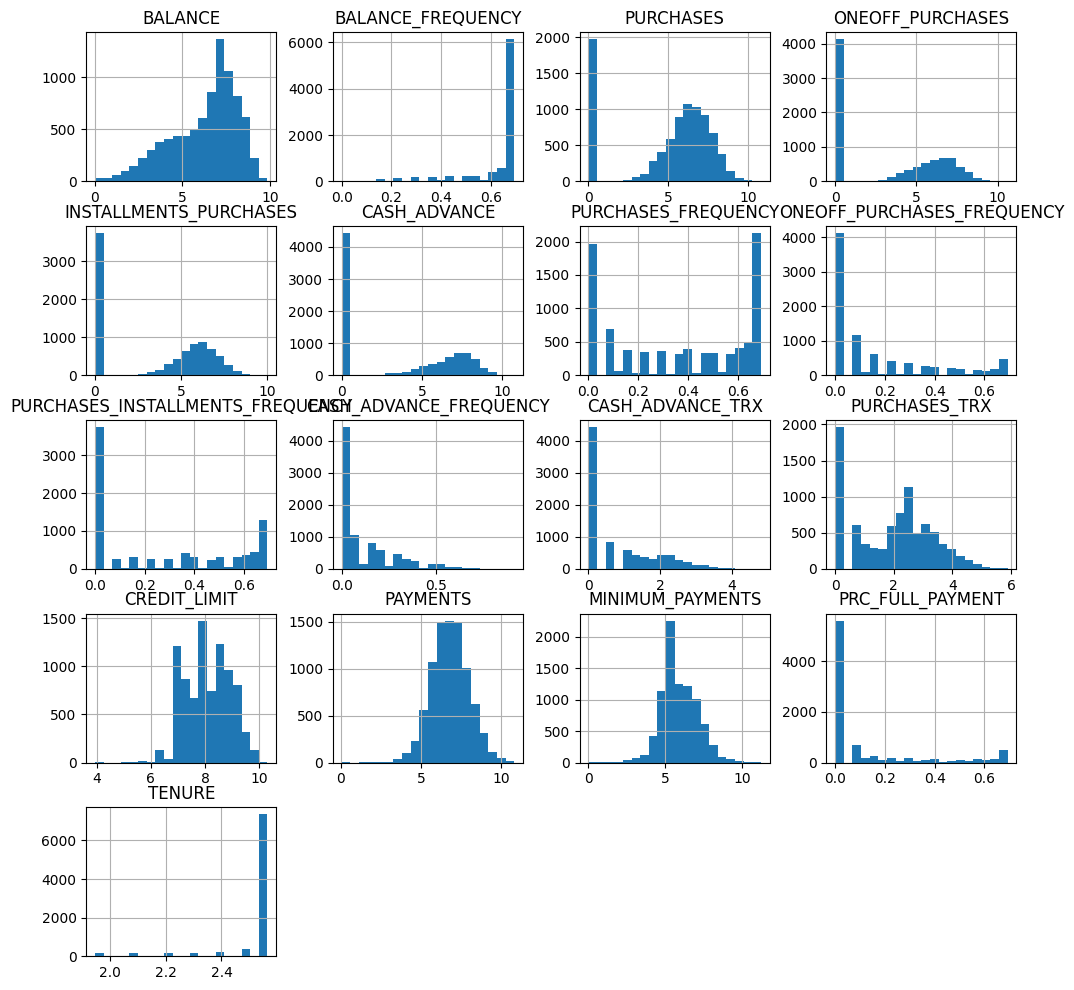

In [209]:
data.hist(figsize=(12,12), bins=20)

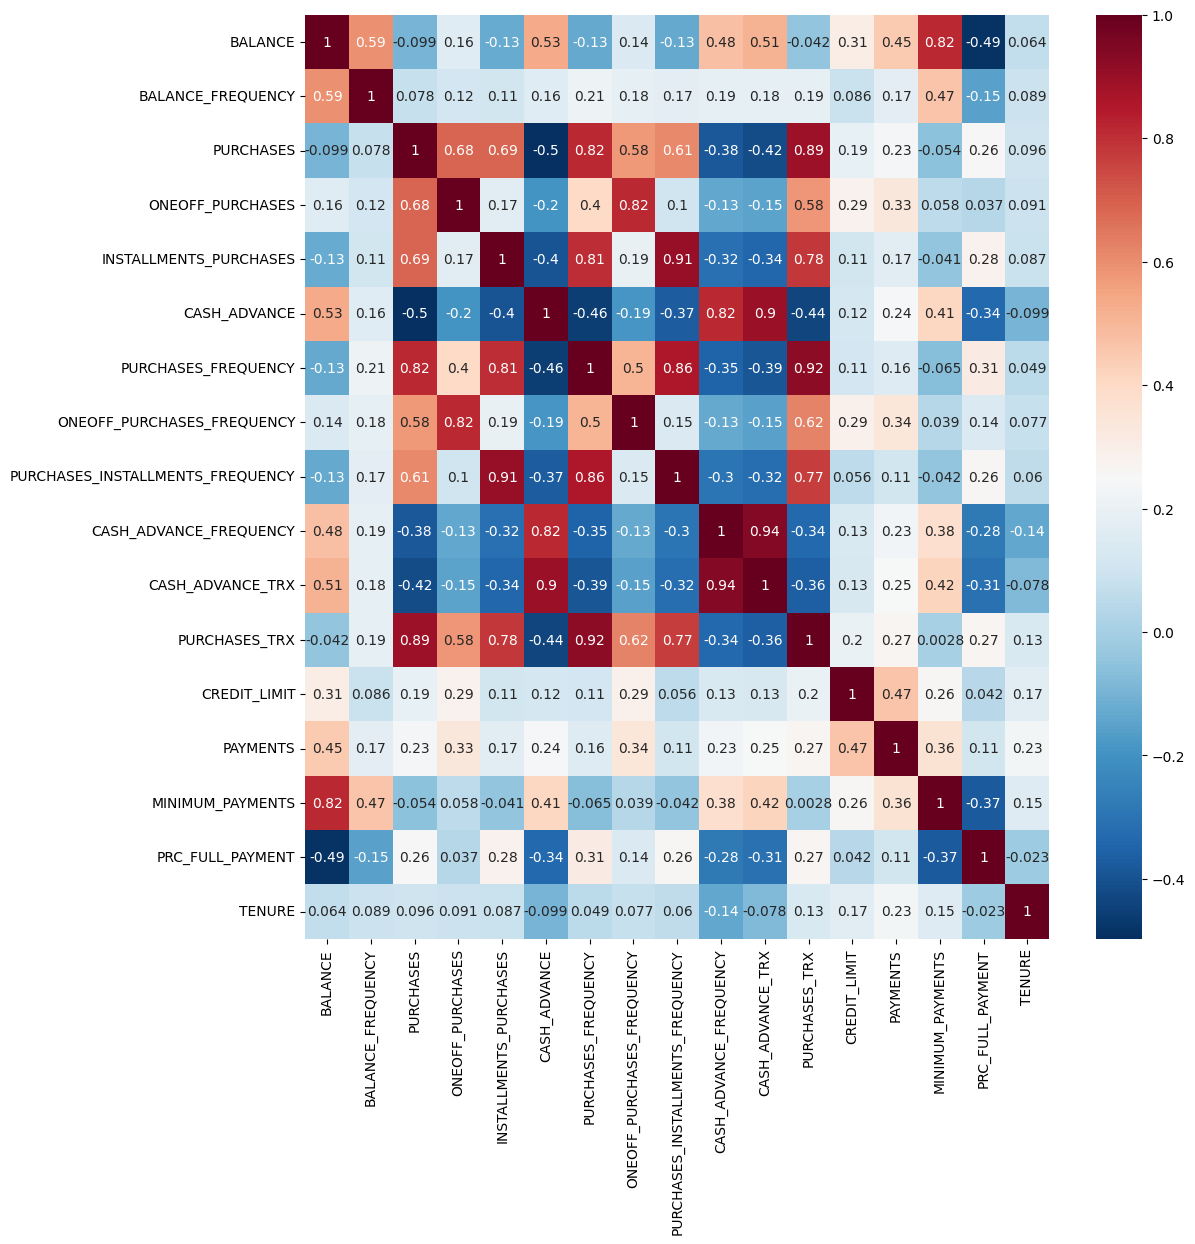

In [210]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), cmap='RdBu_r', annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [235]:
def apply_pca(data, n_components=10):
    n_components = min(n_components, data.shape[1])
    pca = PCA(n_components=n_components)
    data_pca = pca.fit_transform(data)
    explained_variance = np.cumsum(pca.explained_variance_ratio_)
    
    plt.figure(figsize=(6, 4))
    plt.plot(range(1, n_components+1), explained_variance, marker='o', linestyle='--')
    plt.axhline(y=.9, color='r', linestyle='--', label="90% Variance")
    plt.xlabel("Number of Components")
    plt.ylabel("Variance")
    plt.title("Variance vs Components")
    plt.legend()
    plt.show()

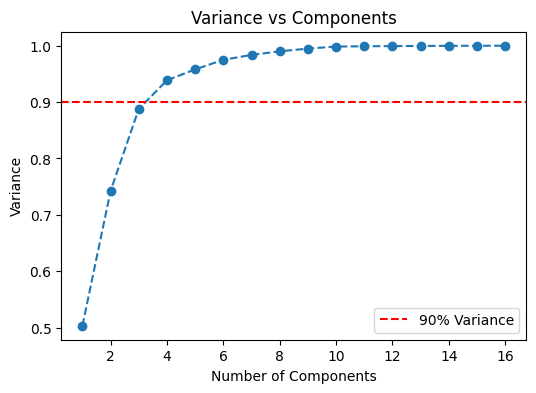

In [236]:
apply_pca(data, n_components=16)

In [237]:
pca = PCA(n_components=4)
data = pca.fit_transform(data)

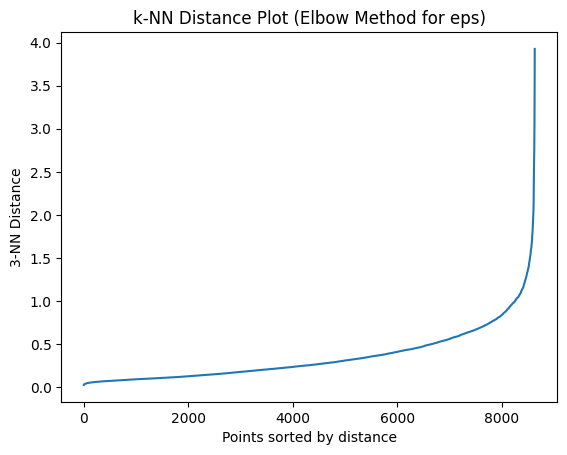

In [238]:
k = 3
nbrs = NearestNeighbors(n_neighbors=k).fit(data)
distances, indices = nbrs.kneighbors(data)

distances = np.sort(distances[:, k-1])

plt.plot(distances)
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{k}-NN Distance")
plt.title("k-NN Distance Plot (Elbow Method for eps)")
plt.show()

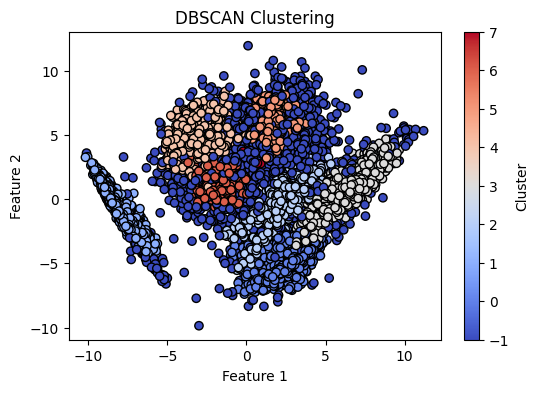

Number of Clusters: 9
score = 0.3885401867071579


In [240]:
dbscan = DBSCAN(eps=1, min_samples=20)
dbscan.fit(data)

plt.figure(figsize=(6, 4))
plt.scatter(data[:, 0], data[:, 1], c=dbscan.labels_, cmap='coolwarm', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN Clustering")
plt.colorbar(label="Cluster")
plt.show()

clusters = set(dbscan.labels_)
print(f"Number of Clusters: {len(clusters)}")

print(f"score = {silhouette_score(data, dbscan.labels_)}")


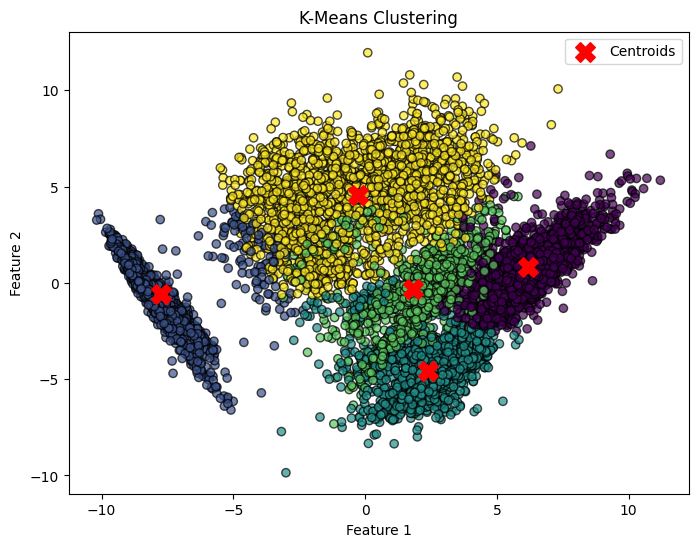

In [241]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(data)
centers = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap="viridis", edgecolors="k", alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c="red", marker="X", s=200, label="Centroids")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering")
plt.legend()
plt.show()


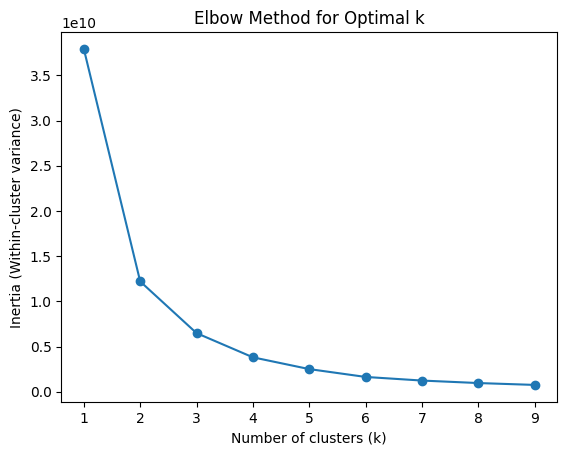

In [242]:
distortions = []
K_range = range(1, 10)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(vis)
    distortions.append(km.inertia_)

plt.plot(K_range, distortions, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (Within-cluster variance)")
plt.title("Elbow Method for Optimal k")
plt.show()


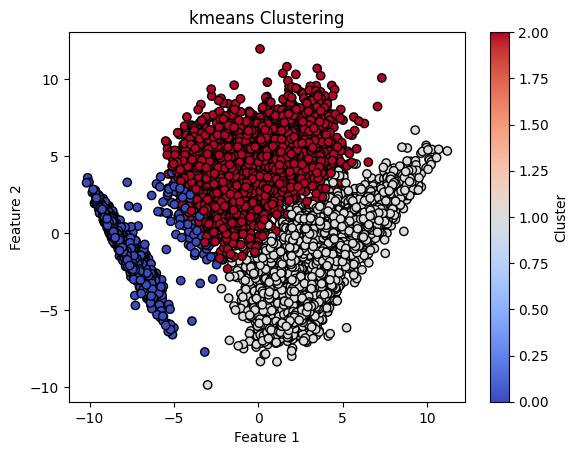

Silhouette Score: 0.42194475955329813


In [243]:
kmodel = KMeans(n_clusters=3)
kmodel.fit(data)

plt.scatter(data[:, 0], data[:,1], c=kmodel.labels_, cmap='coolwarm', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("kmeans Clustering")
plt.colorbar(label="Cluster")
plt.show()

metric = silhouette_score(data, kmodel.labels_)
print(f"Silhouette Score: {metric}")